In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregar os dados já pré-processados
df = pd.read_csv("../data/processed/vendas_processed.csv", index_col="date", parse_dates=True)

df.head()

,vendas,dia_da_semana,em_promocao,feriado_nacional
date,,,,
2023-09-16,52,5,0,0
2023-09-17,58,6,0,0
2023-09-18,54,0,0,0
2023-09-19,59,1,0,0
2023-09-20,72,2,1,0


In [6]:
print(df.describe())
print(df.isnull().sum())
print(df.index.min(), "→", df.index.max())

           vendas  dia_da_semana  em_promocao  feriado_nacional
count  730.000000     730.000000   730.000000        730.000000
mean    53.089041       3.006849     0.045205          0.008219
std      7.534576       2.003072     0.207897          0.090348
min     28.000000       0.000000     0.000000          0.000000
25%     48.000000       1.000000     0.000000          0.000000
50%     53.000000       3.000000     0.000000          0.000000
75%     57.000000       5.000000     0.000000          0.000000
max     86.000000       6.000000     1.000000          1.000000
vendas              0
dia_da_semana       0
em_promocao         0
feriado_nacional    0
dtype: int64
2023-09-16 00:00:00 → 2025-09-14 00:00:00


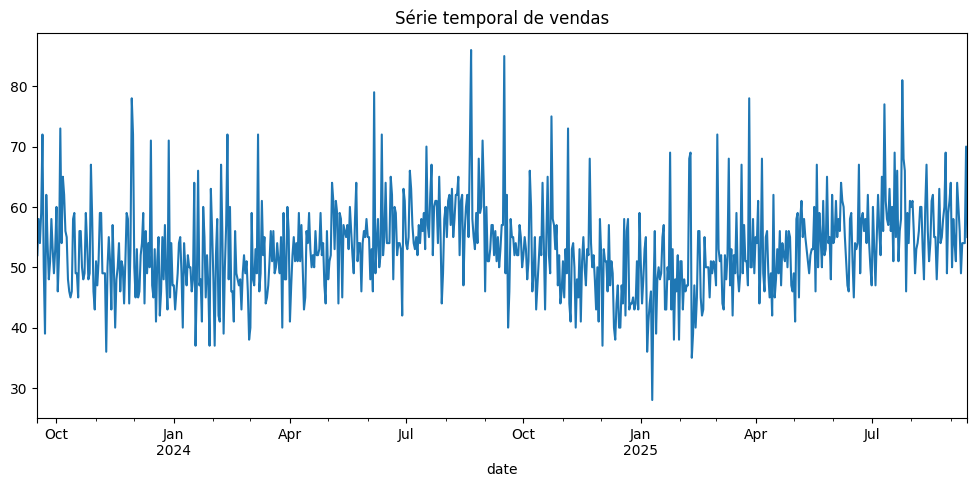

In [8]:
# Evolução das vendas ao longo do tempo
df["vendas"].plot(figsize=(12,5), title="Série temporal de vendas")
plt.show()


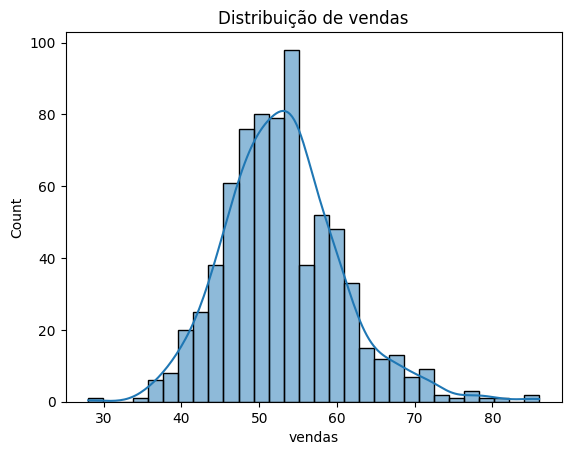

In [9]:
sns.histplot(df["vendas"], kde=True)
plt.title("Distribuição de vendas")
plt.show()


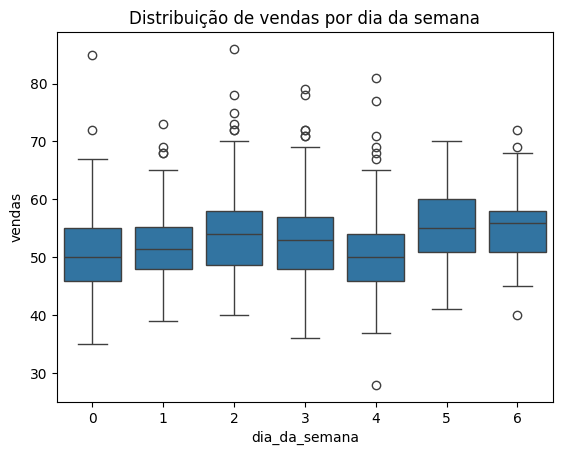

In [10]:
sns.boxplot(x="dia_da_semana", y="vendas", data=df)
plt.title("Distribuição de vendas por dia da semana")
plt.show()

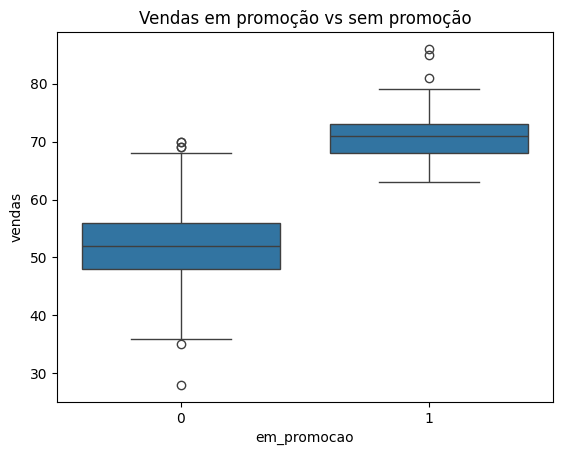

In [11]:
sns.boxplot(x="em_promocao", y="vendas", data=df)
plt.title("Vendas em promoção vs sem promoção")
plt.show()

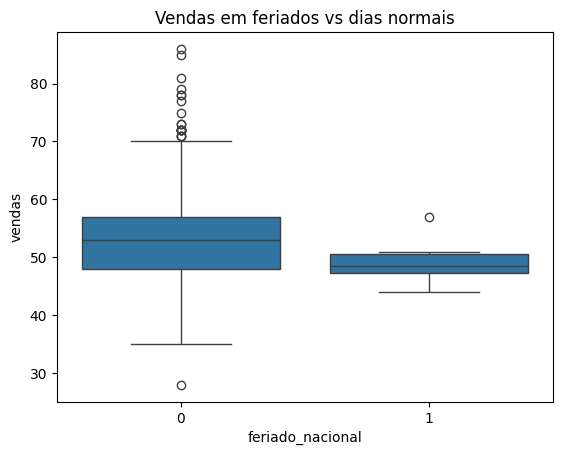

In [12]:
sns.boxplot(x="feriado_nacional", y="vendas", data=df)
plt.title("Vendas em feriados vs dias normais")
plt.show()

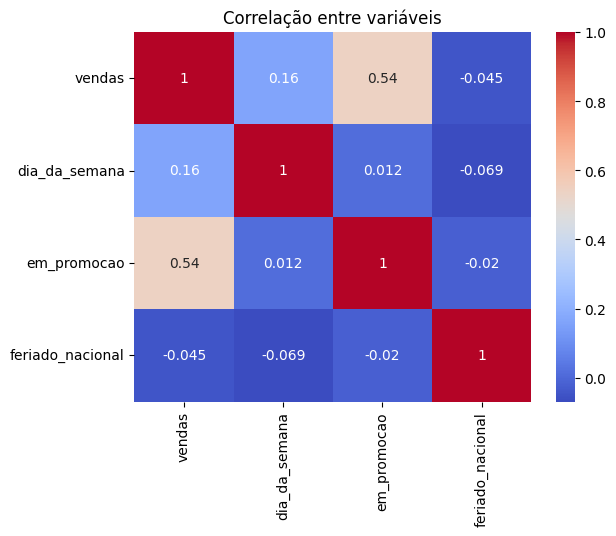

In [13]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()

## Insights obtidos

### Distribuição de Vendas com e sem Promoção

A mediana de vendas em dias com promoção é **claramente superior** à de dias sem promoção. A distribuição para dias promocionais é mais **concentrada**, enquanto dias sem promoção apresentam maior dispersão e **outliers**, indicando vendas mais imprevisíveis.


### Variação Semanal de Vendas

As vendas variam ao longo da semana, com **medianas ligeiramente mais altas em sextas e sábados**. A dispersão geral se mantém estável, mas alguns outliers podem indicar eventos atípicos ou ações pontuais de marketing.


### Distribuição Geral de Vendas

A distribuição das vendas diárias se aproxima de uma **curva normal**, centralizada em torno da média. Isso permite identificar rapidamente **dias com desempenho fora do esperado**, possivelmente relacionados a promoções ou feriados.


### Efeito de Feriados

Nos feriados, observa-se uma **queda média de vendas**, sugerindo menor fluxo de clientes ou impacto de datas especiais. É importante considerar esse efeito na previsão, principalmente quando combinado com promoções.


### Tendências Temporais

A série temporal revela **picos e vales recorrentes**, possivelmente ligados a promoções, sazonalidade ou eventos externos. Há sinais de **ciclos semanais e mensais**, que devem ser modelados para melhorar a acurácia das previsões.


### Outliers e Anomalias

Foram detectados **valores extremos** em determinados dias, tanto em dias promocionais quanto normais. Estes outliers podem indicar **erros de registro ou eventos pontuais** e precisam ser avaliados antes de usar os dados em modelos.


### Correlações e Relevância Estratégica

A análise de correlação mostra que **promoções têm forte impacto nas vendas**, enquanto feriados e dias da semana têm efeito moderado. Essa informação é crucial para priorizar variáveis no forecasting.